# Grab Computer Vision Challenge

Car image classification using fastai library. Dataset from https://ai.stanford.edu/~jkrause/cars/car_dataset.html

## 1. Data exploration

In [1]:
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *

In [3]:
train_folder = 'datasets/stanford-cars/cars_train/'
devkit_folder = 'datasets/stanford-cars/devkit/'
base_folder = 'datasets/stanford-cars/'

In [4]:
!ls datasets/stanford-cars/cars_train

00001.jpg  01165.jpg  02329.jpg  03493.jpg  04657.jpg  05821.jpg  06985.jpg
00002.jpg  01166.jpg  02330.jpg  03494.jpg  04658.jpg  05822.jpg  06986.jpg
00003.jpg  01167.jpg  02331.jpg  03495.jpg  04659.jpg  05823.jpg  06987.jpg
00004.jpg  01168.jpg  02332.jpg  03496.jpg  04660.jpg  05824.jpg  06988.jpg
00005.jpg  01169.jpg  02333.jpg  03497.jpg  04661.jpg  05825.jpg  06989.jpg
00006.jpg  01170.jpg  02334.jpg  03498.jpg  04662.jpg  05826.jpg  06990.jpg
00007.jpg  01171.jpg  02335.jpg  03499.jpg  04663.jpg  05827.jpg  06991.jpg
00008.jpg  01172.jpg  02336.jpg  03500.jpg  04664.jpg  05828.jpg  06992.jpg
00009.jpg  01173.jpg  02337.jpg  03501.jpg  04665.jpg  05829.jpg  06993.jpg
00010.jpg  01174.jpg  02338.jpg  03502.jpg  04666.jpg  05830.jpg  06994.jpg
00011.jpg  01175.jpg  02339.jpg  03503.jpg  04667.jpg  05831.jpg  06995.jpg
00012.jpg  01176.jpg  02340.jpg  03504.jpg  04668.jpg  05832.jpg  06996.jpg
00013.jpg  01177.jpg  02341.jpg  03505.jpg  04669.jpg  05833.jpg  06997.jpg
00014.jpg  0

In [21]:
from PIL import Image

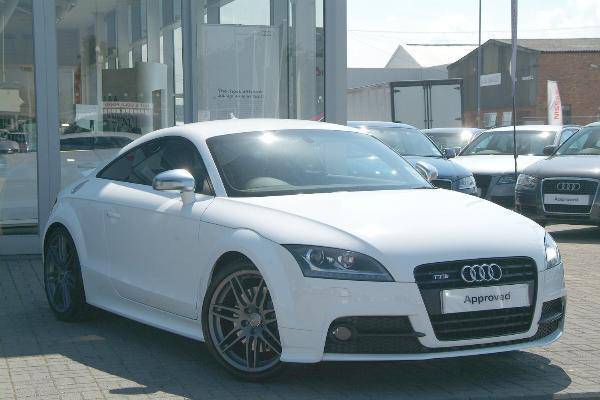

In [6]:
Image.open('{}/00001.jpg'.format(train_folder))

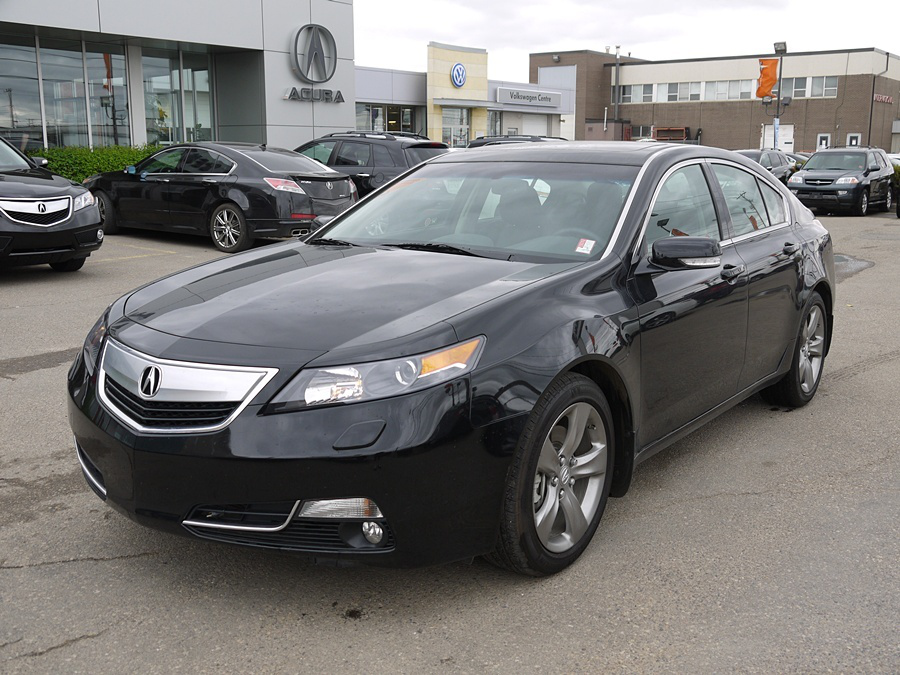

In [7]:
Image.open('{}/00002.jpg'.format(train_folder))

- Check image size distribution

In [8]:
from glob import glob

In [9]:
x, y = [], []
for f in glob('{}/*'.format(train_folder)):
    im = Image.open(f)
    x.append(im.size[0])
    y.append(im.size[1])

In [10]:
import matplotlib.pyplot as plt

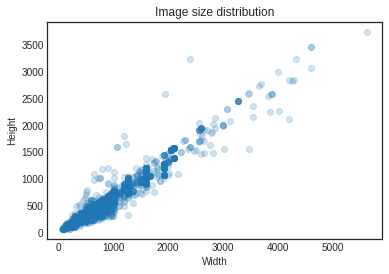

In [11]:
plt.style.use('seaborn-white')
plt.xlabel('Width')
plt.ylabel('Height')
plt.title('Image size distribution')
plt.scatter(x, y, alpha=0.2)

(array([[1.588e+03, 4.100e+01, 1.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [1.190e+02, 2.036e+03, 2.700e+02, 3.000e+00, ..., 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [5.000e+00, 3.260e+02, 1.953e+03, 2.000e+01, ..., 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [0.000e+00, 1.300e+01, 8.500e+01, 7.600e+02, ..., 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        ...,
        [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, ..., 1.000e+00, 0.000e+00, 2.000e+00, 0.000e+00],
        [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]]),
 array([  78. ,  354.9,  631.8,  908.7, 1185.6, 1462.5, 1739.4, 2016.3, 2293.2, 2570.1, 2847. , 3123.9, 3400.8, 3677.7,
        3954.6, 4231.5, 4508.4, 4785.3, 5

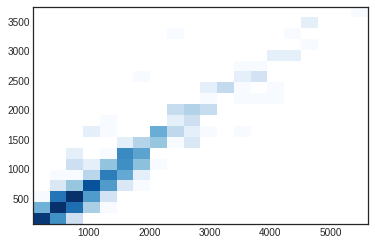

In [12]:
from matplotlib.colors import LogNorm
plt.hist2d(x, y, bins=20, norm=LogNorm(), cmap=plt.get_cmap('Blues'))

We can see that most of the images are < 2000px in width, and < 1500px in height

### Format annotation and metadata to Pandas Dataframe

In [13]:
import scipy.io as sio 

In [14]:
car_train_annos_mat = sio.loadmat('{}/cars_train_annos.mat'.format(devkit_folder))
cars_meta_mat = sio.loadmat('{}/cars_meta.mat'.format(devkit_folder))

In [15]:
car_train_annos_mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sat Dec 14 14:13:07 2013',
 '__version__': '1.0',
 '__globals__': [],
 'annotations': array([[(array([[39]], dtype=uint8), array([[116]], dtype=uint8), array([[569]], dtype=uint16), array([[375]], dtype=uint16), array([[14]], dtype=uint8), array(['00001.jpg'], dtype='<U9')),
         (array([[36]], dtype=uint8), array([[116]], dtype=uint8), array([[868]], dtype=uint16), array([[587]], dtype=uint16), array([[3]], dtype=uint8), array(['00002.jpg'], dtype='<U9')),
         (array([[85]], dtype=uint8), array([[109]], dtype=uint8), array([[601]], dtype=uint16), array([[381]], dtype=uint16), array([[91]], dtype=uint8), array(['00003.jpg'], dtype='<U9')),
         (array([[621]], dtype=uint16), array([[393]], dtype=uint16), array([[1484]], dtype=uint16), array([[1096]], dtype=uint16), array([[134]], dtype=uint8), array(['00004.jpg'], dtype='<U9')),
         ...,
         (array([[138]], dtype=uint8), array([[150]], dtype=uin

In [15]:
cars_meta_mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sat Dec 14 14:13:07 2013',
 '__version__': '1.0',
 '__globals__': [],
 'class_names': array([[array(['AM General Hummer SUV 2000'], dtype='<U26'), array(['Acura RL Sedan 2012'], dtype='<U19'),
         array(['Acura TL Sedan 2012'], dtype='<U19'), array(['Acura TL Type-S 2008'], dtype='<U20'), ...,
         array(['Volvo C30 Hatchback 2012'], dtype='<U24'), array(['Volvo 240 Sedan 1993'], dtype='<U20'),
         array(['Volvo XC90 SUV 2007'], dtype='<U19'), array(['smart fortwo Convertible 2012'], dtype='<U29')]],
       dtype=object)}

In [17]:
car_train_annos = car_train_annos_mat['annotations'][0]
len(car_train_annos)

8144

In [16]:
car_meta = cars_meta_mat['class_names'][0]
len(car_meta)

196

So we know there are 8144 training images, and 196 different car classes (which is same as mentioned in the dataset website)

In [17]:
car_id_to_car_class = {
    (idx + 1): meta[0]
    for idx, meta in enumerate(car_meta)
}

In [18]:
car_id_to_car_class

{1: 'AM General Hummer SUV 2000',
 2: 'Acura RL Sedan 2012',
 3: 'Acura TL Sedan 2012',
 4: 'Acura TL Type-S 2008',
 5: 'Acura TSX Sedan 2012',
 6: 'Acura Integra Type R 2001',
 7: 'Acura ZDX Hatchback 2012',
 8: 'Aston Martin V8 Vantage Convertible 2012',
 9: 'Aston Martin V8 Vantage Coupe 2012',
 10: 'Aston Martin Virage Convertible 2012',
 11: 'Aston Martin Virage Coupe 2012',
 12: 'Audi RS 4 Convertible 2008',
 13: 'Audi A5 Coupe 2012',
 14: 'Audi TTS Coupe 2012',
 15: 'Audi R8 Coupe 2012',
 16: 'Audi V8 Sedan 1994',
 17: 'Audi 100 Sedan 1994',
 18: 'Audi 100 Wagon 1994',
 19: 'Audi TT Hatchback 2011',
 20: 'Audi S6 Sedan 2011',
 21: 'Audi S5 Convertible 2012',
 22: 'Audi S5 Coupe 2012',
 23: 'Audi S4 Sedan 2012',
 24: 'Audi S4 Sedan 2007',
 25: 'Audi TT RS Coupe 2012',
 26: 'BMW ActiveHybrid 5 Sedan 2012',
 27: 'BMW 1 Series Convertible 2012',
 28: 'BMW 1 Series Coupe 2012',
 29: 'BMW 3 Series Sedan 2012',
 30: 'BMW 3 Series Wagon 2012',
 31: 'BMW 6 Series Convertible 2007',
 32: 

In [20]:
import json
with open('{}/car_id_to_car_class_mapping.json'.format(base_folder), 'w') as f:
    json.dump(car_id_to_car_class, f)

In [26]:
car_class_to_class_id = {
    v: k for k, v in mapping.items()
}

with open('{}/car_class_to_car_id_mapping.json'.format(base_folder), 'w') as f:
    json.dump(car_class_to_class_id, f)

In [21]:
car_train_annos[0]

(array([[39]], dtype=uint8), array([[116]], dtype=uint8), array([[569]], dtype=uint16), array([[375]], dtype=uint16), array([[14]], dtype=uint8), array(['00001.jpg'], dtype='<U9'))

In [22]:
import pandas as pd
train_df = pd.DataFrame(
    data=[
        [
            ann_bbox_x1[0][0],
            ann_bbox_y1[0][0],
            ann_bbox_x2[0][0],
            ann_bbox_y2[0][0],
            ann_class[0][0],
            ann_fname[0]
        ] for ann_bbox_x1, ann_bbox_y1, ann_bbox_x2, ann_bbox_y2, ann_class, ann_fname in car_train_annos
    ],
    columns=['bbox_x1', 'bbox_y1', 'bbox_x2', 'bbox_y2', 'class', 'fname']
)

In [23]:
train_df.head()

bbox_x1  bbox_y1  bbox_x2  bbox_y2  class      fname
0       39      116      569      375     14  00001.jpg
1       36      116      868      587      3  00002.jpg
2       85      109      601      381     91  00003.jpg
3      621      393     1484     1096    134  00004.jpg
4       14       36      133       99    106  00005.jpg

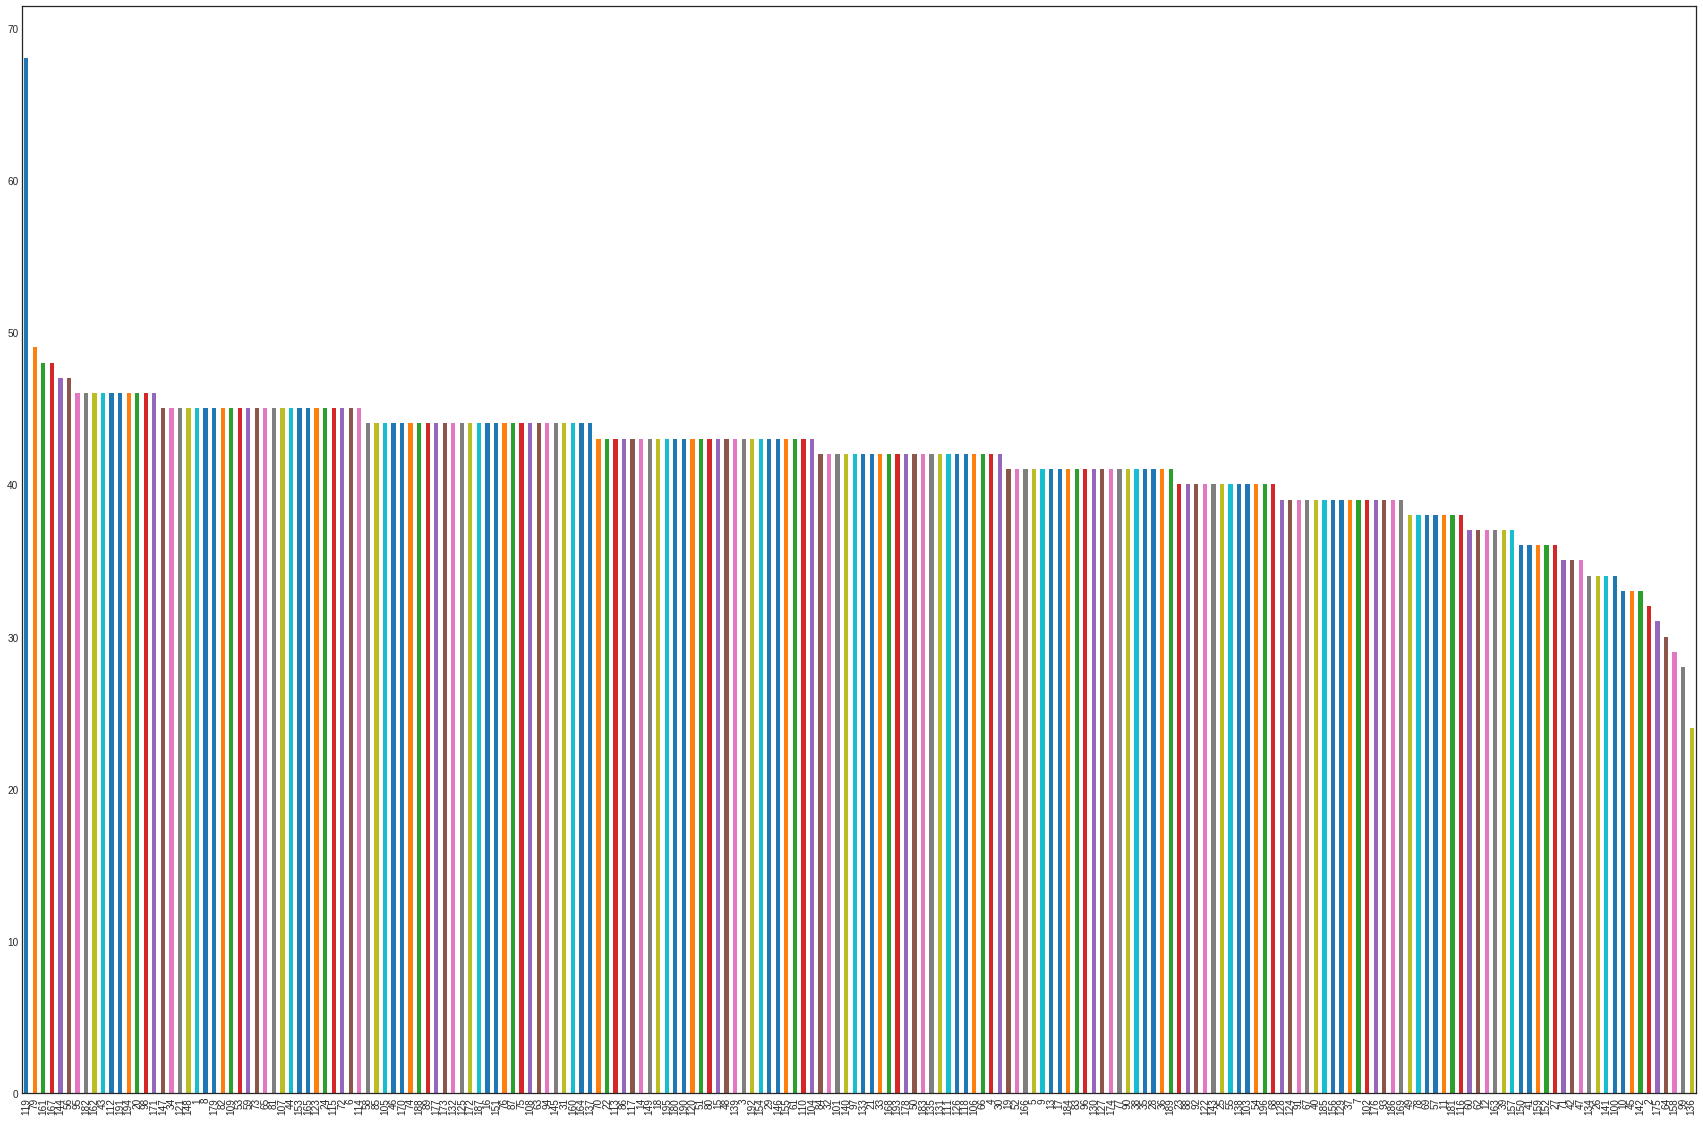

In [24]:
train_df['class'].value_counts().plot(kind='bar', figsize=(30, 20))

In [25]:
car_id_to_car_class[119]

'GMC Savana Van 2012'

In [26]:
car_id_to_car_class[136]

'Hyundai Accent Sedan 2012'

Most of the cars' image are evenly distributed. GMC Savana Van 2012 has around 20 images more than average and Hyndai Accent Sedan 2012 has around 10-20 images less than average.

In [27]:
train_df['class_name'] = train_df['class'].map(car_id_to_car_class)

In [28]:
train_df.head()

bbox_x1  bbox_y1  bbox_x2  bbox_y2  class      fname  \
0       39      116      569      375     14  00001.jpg   
1       36      116      868      587      3  00002.jpg   
2       85      109      601      381     91  00003.jpg   
3      621      393     1484     1096    134  00004.jpg   
4       14       36      133       99    106  00005.jpg   

                            class_name  
0                  Audi TTS Coupe 2012  
1                  Acura TL Sedan 2012  
2           Dodge Dakota Club Cab 2007  
3     Hyundai Sonata Hybrid Sedan 2012  
4  Ford F-450 Super Duty Crew Cab 2012

Save the formatted dataframe for future use

In [29]:
train_df.to_csv('{}/train_df.csv'.format(base_folder), index=False)

## 2. Model Training

### Create ImageDataBunch from Pandas dataframe

start with image size 224 and batch size of 64

In [4]:
BATCH_SIZE = 64
IMG_SIZE = 224

In [5]:
train_df = pd.read_csv('{}/train_df.csv'.format(base_folder))

In [7]:
data = ImageDataBunch.from_df(
    train_folder,
    df=train_df,
    fn_col='fname',
    label_col='class_name',
    size=IMG_SIZE,
    bs=BATCH_SIZE,
    ds_tfms=get_transforms()
).normalize(imagenet_stats)

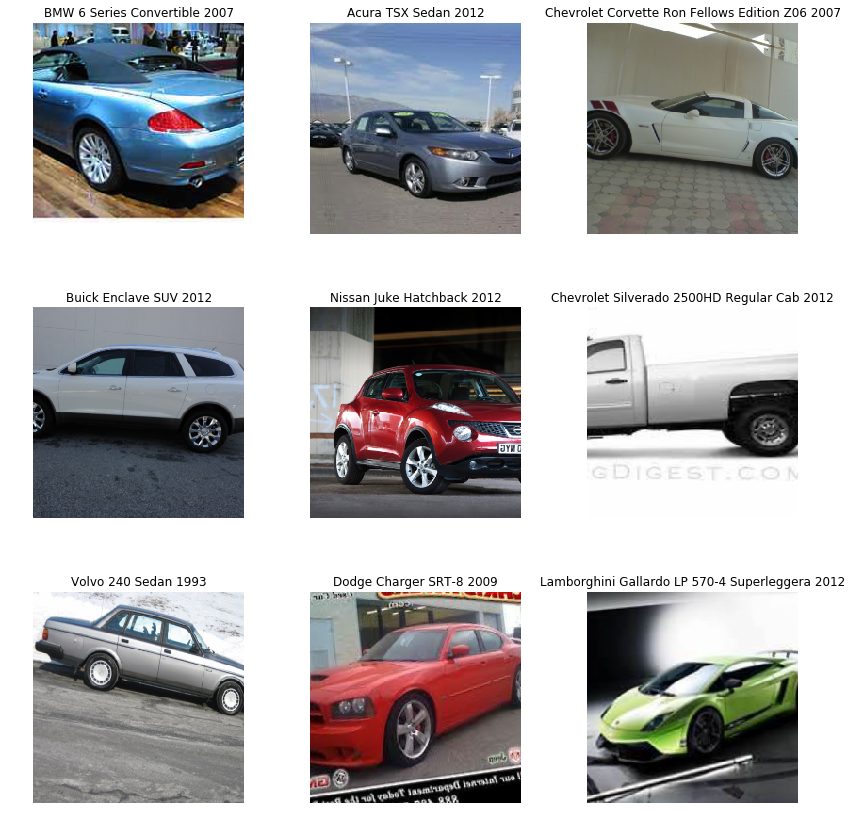

In [8]:
data.show_batch(rows=3)

### Setup a CNN learner with pretrained model

Start from smaller architecture, smaller image size to kick start.

We use resnet as base architecture, and uses pretrained weight to fine tune the model. Reason being the model already trained to recognize 1000 classes in imagenet model which already includes car.

### Resnet34

In [37]:
learner = cnn_learner(data, base_arch=models.resnet34, metrics=[accuracy], path=base_folder)

Use fastai learning rate finder to find the best learning rate for model training. 

Best learning rate is when the value is large enough such that training loss is still decreasing.

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


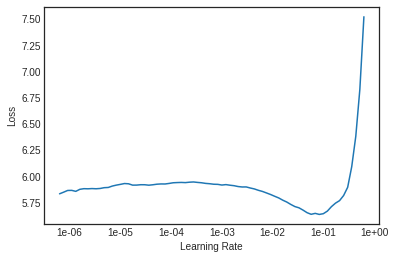

In [38]:
learner.lr_find()
learner.recorder.plot()

In this case the learning rate should be chosen around 1e-2 to 1e-1

In [39]:
learner.fit_one_cycle(5, max_lr=3e-2)

In [40]:
learner.save('resnet34-img-244-freeze-1')

Saving model in the following format: {arch}-img-{img_size}-{freeze/unfreeze}-{number}. 

Training loss and validation loss is decreasing, can continue to train.

In [41]:
learner.fit_one_cycle(10, max_lr=3e-2)

Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/fastai/lib/python3.6/multiprocessing/queues.py", line 240, in _feed
    send_bytes(obj)
  File "/home/ubuntu/anaconda3/envs/fastai/lib/python3.6/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/home/ubuntu/anaconda3/envs/fastai/lib/python3.6/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/home/ubuntu/anaconda3/envs/fastai/lib/python3.6/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)
BrokenPipeError: [Errno 32] Broken pipe
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/fastai/lib/python3.6/multiprocessing/queues.py", line 240, in _feed
    send_bytes(obj)
  File "/home/ubuntu/anaconda3/envs/fastai/lib/python3.6/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/home/ubuntu/anaconda3/envs/fast

KeyboardInterrupt: 

Looks like the model couldn't converge, reload the previous trained weight

In [42]:
learner.load('resnet34-img-244-freeze-1')

Learner(data=ImageDataBunch;

Train: LabelList (6516 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Acura TL Sedan 2012,Dodge Dakota Club Cab 2007,Hyundai Sonata Hybrid Sedan 2012,Geo Metro Convertible 1993,Dodge Journey SUV 2012
Path: datasets/stanford-cars/cars_train;

Valid: LabelList (1628 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Ford Expedition EL SUV 2009,Audi RS 4 Convertible 2008,AM General Hummer SUV 2000,Volkswagen Golf Hatchback 2012,Dodge Charger Sedan 2012
Path: datasets/stanford-cars/cars_train;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1

Unfreeze earlier layers of the model

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


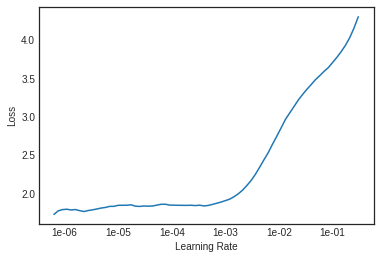

In [43]:
learner.unfreeze()
learner.lr_find()
learner.recorder.plot()

In [44]:
learner.fit_one_cycle(5, max_lr=slice(1e-6, 1e-4))

In [45]:
learner.save('resnet34-img-244-unfreeze-1')

In [46]:
learner.fit_one_cycle(10, max_lr=slice(1e-6, 1e-4))

In [47]:
learner.save('resnet34-img-244-unfreeze-2')

### Resnet50

In [7]:
learner_50 = cnn_learner(data, base_arch=models.resnet50, metrics=[accuracy], path=base_folder)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


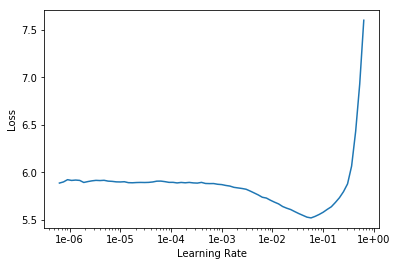

In [15]:
learner_50.lr_find()
learner_50.recorder.plot()

In [16]:
learner_50.fit_one_cycle(5, max_lr=3e-2)

In [17]:
learner_50.save('resnet50-img-244-freeze-1')

In [8]:
learner_50.load('resnet50-img-244-freeze-1')

Learner(data=ImageDataBunch;

Train: LabelList (6516 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Audi TTS Coupe 2012,Acura TL Sedan 2012,Ford F-450 Super Duty Crew Cab 2012,Geo Metro Convertible 1993,Dodge Charger Sedan 2012
Path: datasets/stanford-cars/cars_train;

Valid: LabelList (1628 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Jeep Compass SUV 2012,Dodge Dakota Club Cab 2007,Volvo XC90 SUV 2007,Dodge Challenger SRT8 2011,Tesla Model S Sedan 2012
Path: datasets/stanford-cars/cars_train;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


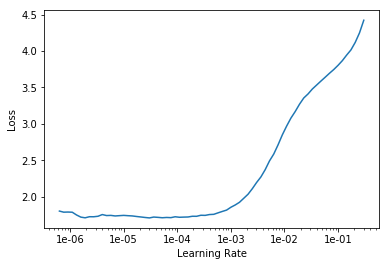

In [9]:
learner_50.unfreeze()
learner_50.lr_find()
learner_50.recorder.plot()

In [10]:
learner_50.fit_one_cycle(5, max_lr=slice(1e-6, 1e-4))

In [11]:
learner_50.save('resnet50-img-244-unfreeze-1')

In [12]:
learner_50.fit_one_cycle(10, max_lr=slice(1e-6, 1e-4))

In [13]:
learner_50.save('resnet50-img-244-unfreeze-2')

### Resnet101

In [16]:
del learner_50
torch.cuda.empty_cache()

In [17]:
data.batch_size = BATCH_SIZE // 2

In [18]:
learner_101 = cnn_learner(data, base_arch=models.resnet101, metrics=[accuracy], path=base_folder)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


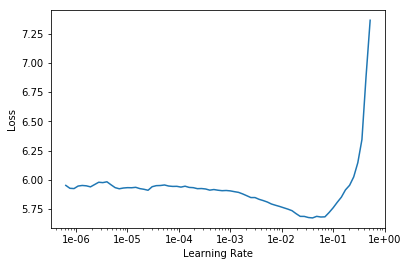

In [19]:
learner_101.lr_find()
learner_101.recorder.plot()

In [ ]:
learner_101.fit_one_cycle(5, max_lr=3e-2)

In [ ]:
learner_101.save('resnet101-img-244-unfreeze-1')

### Resnet152

In [14]:
torch.cuda.empty_cache()

In [15]:
data.batch_size = BATCH_SIZE // 4

In [16]:
data.batch_size

16

In [17]:
learner_152 = cnn_learner(data, base_arch=models.resnet152, metrics=[accuracy], path=base_folder)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


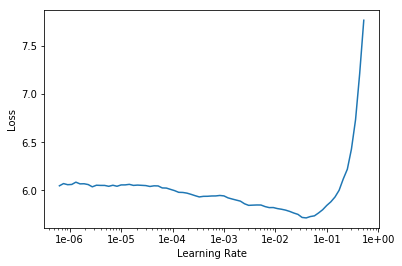

In [18]:
learner_152.lr_find()
learner_152.recorder.plot()

In [19]:
# tried with 3e-2 learning rate but not converging.. use a lower one
learner_152.fit_one_cycle(5, max_lr=1e-2)

In [20]:
learner_152.save('resnet152-img-244-unfreeze-1')

In [21]:
learner_152.fit_one_cycle(5, max_lr=1e-2)

*Resnet50* seems to have a good balance between training time and accuracy.. let's focus on the architecture for now.

## 3. Progressive resizing

We can train on larger image using the trained model weights, that brings 2 benefits:
1. Since we are training on higher resolution, we can get a better trained model with higher accuracy
2. The model will be generalized better

Since we know the distribution of the image sizes are generally <2000px in width and 1500px in height, we can safely increase the image sizes to feed into our model

In [42]:
torch.cuda.empty_cache()

In [4]:
train_df = pd.read_csv('{}/train_df.csv'.format(base_folder))
IMG_SIZE = 299
BATCH_SIZE = 32

In [5]:
data_299 = ImageDataBunch.from_df(
    train_folder,
    df=train_df,
    fn_col='fname',
    label_col='class_name',
    size=IMG_SIZE,
    bs=BATCH_SIZE,
    ds_tfms=get_transforms()
).normalize(imagenet_stats)

In [6]:
data_299.train_ds[0]

(Image (3, 299, 299), Category Acura TL Sedan 2012)

In [7]:
learner_50 = cnn_learner(data_299, base_arch=models.resnet50, metrics=[accuracy], path=base_folder)

In [8]:
learner_50.load('resnet50-img-244-unfreeze-2')

Learner(data=ImageDataBunch;

Train: LabelList (6516 items)
x: ImageList
Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299)
y: CategoryList
Acura TL Sedan 2012,Hyundai Sonata Hybrid Sedan 2012,Ford F-450 Super Duty Crew Cab 2012,Geo Metro Convertible 1993,Dodge Journey SUV 2012
Path: datasets/stanford-cars/cars_train;

Valid: LabelList (1628 items)
x: ImageList
Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299)
y: CategoryList
Acura Integra Type R 2001,Bugatti Veyron 16.4 Convertible 2009,Bugatti Veyron 16.4 Coupe 2009,BMW X5 SUV 2007,McLaren MP4-12C Coupe 2012
Path: datasets/stanford-cars/cars_train;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, p

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


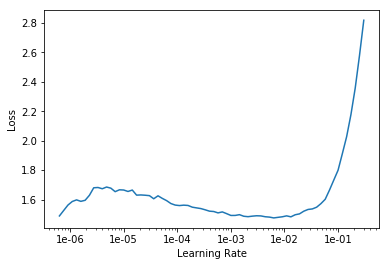

In [9]:
learner_50.lr_find()
learner_50.recorder.plot()

In [11]:
learner_50.fit_one_cycle(5, max_lr=1e-3)

In [12]:
learner_50.save('resnet50-img-299-freeze-1')

In [13]:
# train more!
learner_50.fit_one_cycle(10, max_lr=1e-3)

Unfreeze the model and train

In [17]:
learner_50.freeze()
learner_50.save('resnet50-img-299-freeze-2')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


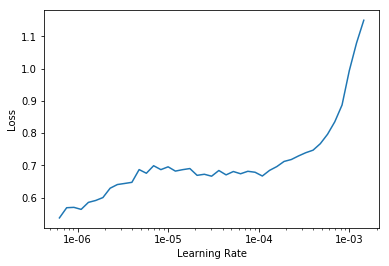

In [14]:
learner_50.unfreeze()
learner_50.lr_find()
learner_50.recorder.plot()

In [20]:
learner_50.unfreeze()

In [21]:
learner_50.fit_one_cycle(3, max_lr=slice(5e-6, 5e-5))

In [22]:
learner_50.fit_one_cycle(5, max_lr=slice(5e-6, 5e-5))

In [23]:
learner_50.save('resnet50-img-299-unfreeze-1')

try to train with larger image!

In [5]:
IMG_SIZE = 480
BATCH_SIZE = 16

In [6]:
data_480 = ImageDataBunch.from_df(
    train_folder,
    df=train_df,
    fn_col='fname',
    label_col='class_name',
    size=IMG_SIZE,
    bs=BATCH_SIZE,
    ds_tfms=get_transforms()
).normalize(imagenet_stats)

In [7]:
learner_50 = cnn_learner(data_480, base_arch=models.resnet50, metrics=[accuracy], path=base_folder)

In [30]:
learner_50.load('resnet50-img-299-unfreeze-1')

Learner(data=ImageDataBunch;

Train: LabelList (6516 items)
x: ImageList
Image (3, 480, 480),Image (3, 480, 480),Image (3, 480, 480),Image (3, 480, 480),Image (3, 480, 480)
y: CategoryList
Acura TL Sedan 2012,Dodge Dakota Club Cab 2007,Ford F-450 Super Duty Crew Cab 2012,Geo Metro Convertible 1993,Dodge Journey SUV 2012
Path: datasets/stanford-cars/cars_train;

Valid: LabelList (1628 items)
x: ImageList
Image (3, 480, 480),Image (3, 480, 480),Image (3, 480, 480),Image (3, 480, 480),Image (3, 480, 480)
y: CategoryList
Lamborghini Aventador Coupe 2012,Audi S5 Convertible 2012,Nissan 240SX Coupe 1998,Dodge Challenger SRT8 2011,BMW 1 Series Coupe 2012
Path: datasets/stanford-cars/cars_train;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, 

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


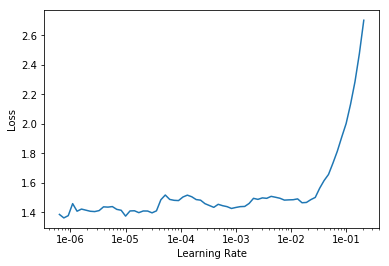

In [32]:
learner_50.lr_find()
learner_50.recorder.plot()

In [33]:
learner_50.fit_one_cycle(5, max_lr=1e-3)

In [34]:
learner_50.save('resnet50-img-480-freeze-1')

In [8]:
learner_50.load('resnet50-img-480-freeze-1')

Learner(data=ImageDataBunch;

Train: LabelList (6516 items)
x: ImageList
Image (3, 480, 480),Image (3, 480, 480),Image (3, 480, 480),Image (3, 480, 480),Image (3, 480, 480)
y: CategoryList
Audi TTS Coupe 2012,Acura TL Sedan 2012,Dodge Dakota Club Cab 2007,Ford F-450 Super Duty Crew Cab 2012,Geo Metro Convertible 1993
Path: datasets/stanford-cars/cars_train;

Valid: LabelList (1628 items)
x: ImageList
Image (3, 480, 480),Image (3, 480, 480),Image (3, 480, 480),Image (3, 480, 480),Image (3, 480, 480)
y: CategoryList
Hyundai Sonata Sedan 2012,Dodge Durango SUV 2012,Land Rover Range Rover SUV 2012,Jeep Liberty SUV 2012,Chevrolet Avalanche Crew Cab 2012
Path: datasets/stanford-cars/cars_train;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1,

In [9]:
learner_50.fit_one_cycle(10, max_lr=1e-3)

In [10]:
learner_50.save('resnet50-img-480-freeze-2')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


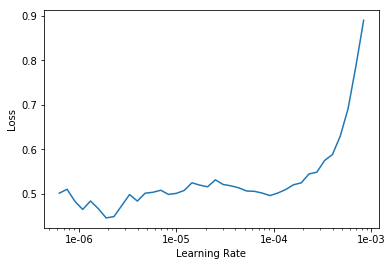

In [11]:
learner_50.unfreeze()
learner_50.lr_find()
learner_50.recorder.plot()

In [12]:
learner_50.fit_one_cycle(5, max_lr=slice(1e-6, 1e-5))

In [13]:
learner_50.save('resnet50-img-480-unfreeze-1')

## 4. Train on rectangular image

Lets see if we can train in rectangular format and whether the model accuracy improved, since most car images are rectangular in general

In [16]:
torch.cuda.empty_cache()

In [17]:
train_df = pd.read_csv('{}/train_df.csv'.format(base_folder))
IMG_SIZE = 544
BATCH_SIZE = 8

In [19]:
train_df.head()

bbox_x1  bbox_y1  bbox_x2  bbox_y2  class      fname  \
0       39      116      569      375     14  00001.jpg   
1       36      116      868      587      3  00002.jpg   
2       85      109      601      381     91  00003.jpg   
3      621      393     1484     1096    134  00004.jpg   
4       14       36      133       99    106  00005.jpg   

                            class_name  
0                  Audi TTS Coupe 2012  
1                  Acura TL Sedan 2012  
2           Dodge Dakota Club Cab 2007  
3     Hyundai Sonata Hybrid Sedan 2012  
4  Ford F-450 Super Duty Crew Cab 2012

In [22]:
for idx, row in train_df.iterrows():
    im = Image.open('{}/{}'.format(train_folder, row['fname']))
    train_df.loc[idx, 'width'] = im.size[0]
    train_df.loc[idx, 'height'] = im.size[1]
    train_df.loc[idx, 'aspect_ratio'] = im.size[0] * 1.0 / im.size[1]

In [23]:
train_df.head()

bbox_x1  bbox_y1  bbox_x2  bbox_y2  class      fname  \
0       39      116      569      375     14  00001.jpg   
1       36      116      868      587      3  00002.jpg   
2       85      109      601      381     91  00003.jpg   
3      621      393     1484     1096    134  00004.jpg   
4       14       36      133       99    106  00005.jpg   

                            class_name   width  height  aspect_ratio  
0                  Audi TTS Coupe 2012   600.0   400.0      1.500000  
1                  Acura TL Sedan 2012   900.0   675.0      1.333333  
2           Dodge Dakota Club Cab 2007   640.0   480.0      1.333333  
3     Hyundai Sonata Hybrid Sedan 2012  2100.0  1386.0      1.515152  
4  Ford F-450 Super Duty Crew Cab 2012   144.0   108.0      1.333333

In [24]:
train_df.to_csv('{}/train_df_with_aspect_ratio.csv'.format(base_folder), index=False)

(array([2.400e+01, 2.180e+02, 6.060e+03, 1.438e+03, 2.710e+02, 8.200e+01, 3.200e+01, 1.600e+01, 2.000e+00, 1.000e+00]),
 array([0.593066, 0.922513, 1.25196 , 1.581407, 1.910855, 2.240302, 2.569749, 2.899196, 3.228644, 3.558091, 3.887538]),
 <a list of 10 Patch objects>)

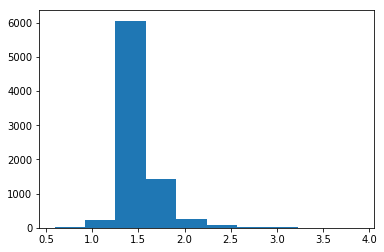

In [25]:
plt.hist(train_df['aspect_ratio'], bins=10)

Most aspect ratio are around 1.5

In [4]:
train_df = pd.read_csv('{}/train_df_with_aspect_ratio.csv'.format(base_folder))

In [6]:
IMG_SIZE = (400, 600)
BATCH_SIZE = 4

In [7]:
data_rect = ImageDataBunch.from_df(
    train_folder,
    df=train_df,
    fn_col='fname',
    label_col='class_name',
    size=IMG_SIZE,
    bs=BATCH_SIZE,
    ds_tfms=get_transforms()
).normalize(imagenet_stats)

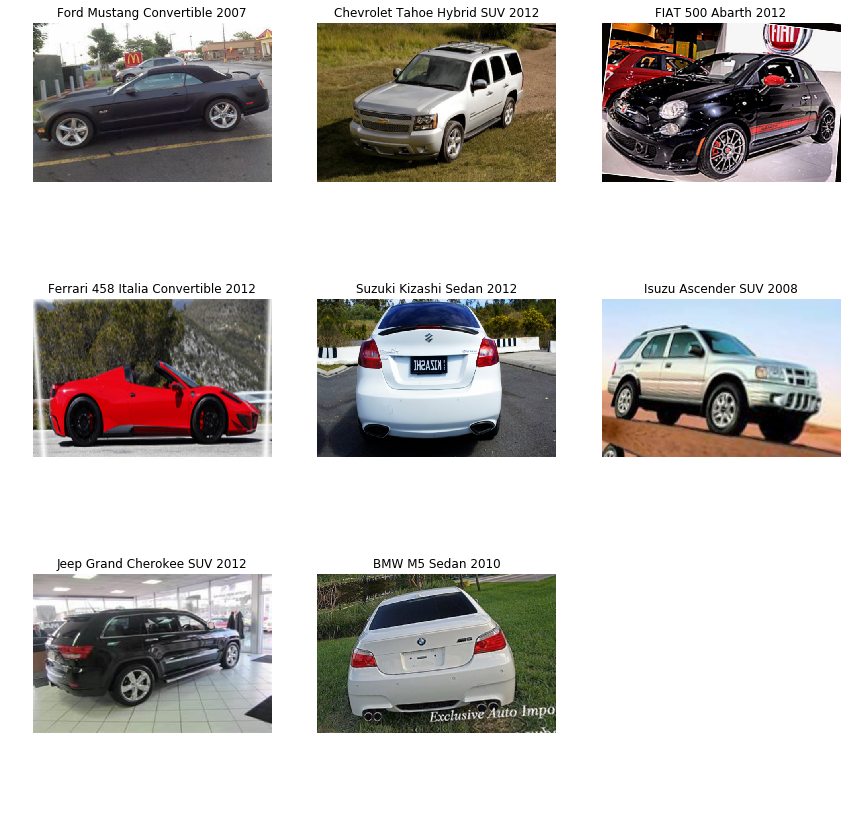

In [29]:
data_rect.show_batch(3)

In [31]:
data_rect.train_ds[1]

(Image (3, 400, 600), Category Ford F-450 Super Duty Crew Cab 2012)

In [8]:
learner_50 = cnn_learner(data_rect, base_arch=models.resnet50, metrics=[accuracy], path=base_folder)

In [36]:
learner_50.load('resnet50-img-480-unfreeze-1')

Learner(data=ImageDataBunch;

Train: LabelList (6516 items)
x: ImageList
Image (3, 400, 600),Image (3, 400, 600),Image (3, 400, 600),Image (3, 400, 600),Image (3, 400, 600)
y: CategoryList
Hyundai Sonata Hybrid Sedan 2012,Ford F-450 Super Duty Crew Cab 2012,Geo Metro Convertible 1993,Dodge Journey SUV 2012,Dodge Charger Sedan 2012
Path: datasets/stanford-cars/cars_train;

Valid: LabelList (1628 items)
x: ImageList
Image (3, 400, 600),Image (3, 400, 600),Image (3, 400, 600),Image (3, 400, 600),Image (3, 400, 600)
y: CategoryList
Jeep Liberty SUV 2012,Audi 100 Wagon 1994,Audi TTS Coupe 2012,Rolls-Royce Ghost Sedan 2012,Lamborghini Reventon Coupe 2008
Path: datasets/stanford-cars/cars_train;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1,

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


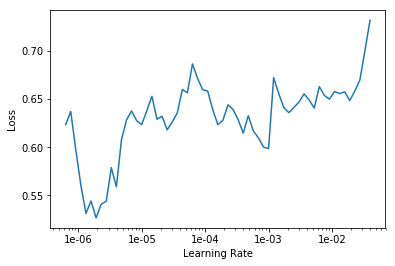

In [37]:
learner_50.lr_find()
learner_50.recorder.plot()

In [38]:
learner_50.fit_one_cycle(5, max_lr=1e-6)

In [39]:
learner_50.save('resnet50-img-rect-400x600-freeze-1')

In [9]:
learner_50.load('resnet50-img-rect-400x600-freeze-1')

Learner(data=ImageDataBunch;

Train: LabelList (6516 items)
x: ImageList
Image (3, 400, 600),Image (3, 400, 600),Image (3, 400, 600),Image (3, 400, 600),Image (3, 400, 600)
y: CategoryList
Audi TTS Coupe 2012,Dodge Dakota Club Cab 2007,Hyundai Sonata Hybrid Sedan 2012,Geo Metro Convertible 1993,Dodge Charger Sedan 2012
Path: datasets/stanford-cars/cars_train;

Valid: LabelList (1628 items)
x: ImageList
Image (3, 400, 600),Image (3, 400, 600),Image (3, 400, 600),Image (3, 400, 600),Image (3, 400, 600)
y: CategoryList
Audi S4 Sedan 2007,Audi TTS Coupe 2012,Chevrolet Silverado 1500 Regular Cab 2012,Dodge Ram Pickup 3500 Quad Cab 2009,Chevrolet Silverado 1500 Classic Extended Cab 2007
Path: datasets/stanford-cars/cars_train;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(ke

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


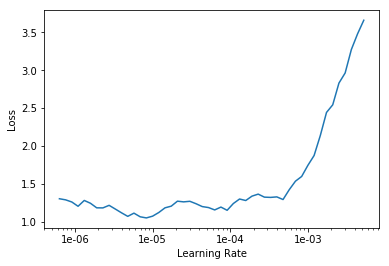

In [10]:
learner_50.unfreeze()
learner_50.lr_find()
learner_50.recorder.plot()

In [11]:
learner_50.fit_one_cycle(5, max_lr=slice(1e-6, 1e-5))

KeyboardInterrupt: 

Training loss doesn't decrease. Don't bother with unfreezing

In [12]:
learner_50.load('resnet50-img-rect-400x600-freeze-1')

Learner(data=ImageDataBunch;

Train: LabelList (6516 items)
x: ImageList
Image (3, 400, 600),Image (3, 400, 600),Image (3, 400, 600),Image (3, 400, 600),Image (3, 400, 600)
y: CategoryList
Audi TTS Coupe 2012,Dodge Dakota Club Cab 2007,Hyundai Sonata Hybrid Sedan 2012,Geo Metro Convertible 1993,Dodge Charger Sedan 2012
Path: datasets/stanford-cars/cars_train;

Valid: LabelList (1628 items)
x: ImageList
Image (3, 400, 600),Image (3, 400, 600),Image (3, 400, 600),Image (3, 400, 600),Image (3, 400, 600)
y: CategoryList
Audi S4 Sedan 2007,Audi TTS Coupe 2012,Chevrolet Silverado 1500 Regular Cab 2012,Dodge Ram Pickup 3500 Quad Cab 2009,Chevrolet Silverado 1500 Classic Extended Cab 2007
Path: datasets/stanford-cars/cars_train;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(ke

In [13]:
learner_50.freeze()

In [14]:
learner_50.fit_one_cycle(10, max_lr=1e-6)

In [15]:
learner_50.save('resnet50-img-rect-400x600-freeze-2')

Export the best model seen

In [17]:
learner_50.load('resnet50-img-rect-400x600-freeze-1')

Learner(data=ImageDataBunch;

Train: LabelList (6516 items)
x: ImageList
Image (3, 400, 600),Image (3, 400, 600),Image (3, 400, 600),Image (3, 400, 600),Image (3, 400, 600)
y: CategoryList
Audi TTS Coupe 2012,Dodge Dakota Club Cab 2007,Hyundai Sonata Hybrid Sedan 2012,Geo Metro Convertible 1993,Dodge Charger Sedan 2012
Path: datasets/stanford-cars/cars_train;

Valid: LabelList (1628 items)
x: ImageList
Image (3, 400, 600),Image (3, 400, 600),Image (3, 400, 600),Image (3, 400, 600),Image (3, 400, 600)
y: CategoryList
Audi S4 Sedan 2007,Audi TTS Coupe 2012,Chevrolet Silverado 1500 Regular Cab 2012,Dodge Ram Pickup 3500 Quad Cab 2009,Chevrolet Silverado 1500 Classic Extended Cab 2007
Path: datasets/stanford-cars/cars_train;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(ke

In [18]:
learner_50.export()

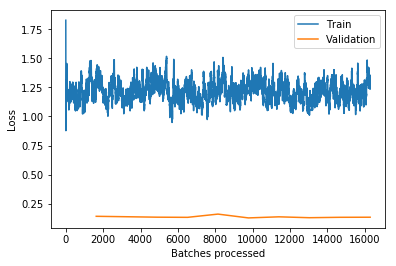

In [19]:
learner_50.recorder.plot_losses()

## 5. Predict on test set

In [27]:
test_folder = 'datasets/stanford-cars/cars_test/'

In [28]:
learner = load_learner(base_folder, file='export.pkl', test=ImageList.from_folder(test_folder))

In [29]:
learner.data

ImageDataBunch;

Train: LabelList (0 items)
x: ImageList

y: CategoryList

Path: datasets/stanford-cars;

Valid: LabelList (0 items)
x: ImageList

y: CategoryList

Path: datasets/stanford-cars;

Test: LabelList (8041 items)
x: ImageList
Image (3, 400, 600),Image (3, 400, 600),Image (3, 400, 600),Image (3, 400, 600),Image (3, 400, 600)
y: EmptyLabelList
,,,,
Path: datasets/stanford-cars

In [30]:
preds, _ = learner.TTA(ds_type=DatasetType.Test)

In [31]:
preds

tensor([[1.5075e-04, 1.1909e-04, 2.3892e-04,  ..., 2.8885e-03, 1.9622e-04,
         3.0198e-03],
        [7.0519e-10, 7.5133e-07, 9.7138e-05,  ..., 2.8645e-06, 3.7042e-07,
         1.1178e-06],
        [1.9447e-06, 7.6579e-07, 5.7949e-07,  ..., 6.4316e-03, 2.9395e-05,
         3.8314e-05],
        ...,
        [3.3261e-04, 2.1479e-05, 2.2443e-02,  ..., 2.9561e-05, 1.8556e-05,
         1.6802e-05],
        [1.7042e-07, 6.2260e-07, 4.2361e-07,  ..., 6.6960e-06, 3.4512e-06,
         6.2778e-08],
        [5.7317e-05, 3.6173e-07, 3.4276e-06,  ..., 1.3345e-05, 8.4506e-01,
         4.2781e-06]])

In [32]:
prediction_idx = np.argmax(preds, axis=1)

In [33]:
prediction_idx

tensor([115,  71,  42,  ..., 126,  32, 194])

In [34]:
data_class = learner.data.classes

In [35]:
predicted_classes = [data_class[idx] for idx in prediction_idx]

In [36]:
predicted_classes

['Ford Mustang Convertible 2007',
 'Chevrolet Sonic Sedan 2012',
 'Bentley Continental Supersports Conv. Convertible 2012',
 'Audi S6 Sedan 2011',
 'BMW X6 SUV 2012',
 'Acura TL Sedan 2012',
 'Dodge Charger SRT-8 2009',
 'Ram C/V Cargo Van Minivan 2012',
 'Ford Freestar Minivan 2007',
 'Geo Metro Convertible 1993',
 'Audi R8 Coupe 2012',
 'Bentley Continental GT Coupe 2012',
 'Ferrari California Convertible 2012',
 'Chevrolet Malibu Sedan 2007',
 'Audi 100 Wagon 1994',
 'Ford Edge SUV 2012',
 'Acura ZDX Hatchback 2012',
 'Porsche Panamera Sedan 2012',
 'Cadillac Escalade EXT Crew Cab 2007',
 'Hyundai Veracruz SUV 2012',
 'Buick Regal GS 2012',
 'Hyundai Tucson SUV 2012',
 'Bugatti Veyron 16.4 Coupe 2009',
 'GMC Terrain SUV 2012',
 'Bentley Continental GT Coupe 2012',
 'Nissan Juke Hatchback 2012',
 'Ford F-150 Regular Cab 2007',
 'Bugatti Veyron 16.4 Coupe 2009',
 'BMW 3 Series Wagon 2012',
 'BMW 1 Series Convertible 2012',
 'Aston Martin V8 Vantage Convertible 2012',
 'Suzuki Aerio Se

In [37]:
learner.data.classes[115]

'Ford Mustang Convertible 2007'

In [38]:
car_class_to_class_id = {
    v: k for k, v in car_id_to_car_class.items()
}

In [39]:
car_class_to_class_id

{'AM General Hummer SUV 2000': 1,
 'Acura RL Sedan 2012': 2,
 'Acura TL Sedan 2012': 3,
 'Acura TL Type-S 2008': 4,
 'Acura TSX Sedan 2012': 5,
 'Acura Integra Type R 2001': 6,
 'Acura ZDX Hatchback 2012': 7,
 'Aston Martin V8 Vantage Convertible 2012': 8,
 'Aston Martin V8 Vantage Coupe 2012': 9,
 'Aston Martin Virage Convertible 2012': 10,
 'Aston Martin Virage Coupe 2012': 11,
 'Audi RS 4 Convertible 2008': 12,
 'Audi A5 Coupe 2012': 13,
 'Audi TTS Coupe 2012': 14,
 'Audi R8 Coupe 2012': 15,
 'Audi V8 Sedan 1994': 16,
 'Audi 100 Sedan 1994': 17,
 'Audi 100 Wagon 1994': 18,
 'Audi TT Hatchback 2011': 19,
 'Audi S6 Sedan 2011': 20,
 'Audi S5 Convertible 2012': 21,
 'Audi S5 Coupe 2012': 22,
 'Audi S4 Sedan 2012': 23,
 'Audi S4 Sedan 2007': 24,
 'Audi TT RS Coupe 2012': 25,
 'BMW ActiveHybrid 5 Sedan 2012': 26,
 'BMW 1 Series Convertible 2012': 27,
 'BMW 1 Series Coupe 2012': 28,
 'BMW 3 Series Sedan 2012': 29,
 'BMW 3 Series Wagon 2012': 30,
 'BMW 6 Series Convertible 2007': 31,
 'BMW

In [41]:
predicted_class_id = [car_class_to_class_id[pred_class] for pred_class in predicted_classes]

In [42]:
predicted_class_id

[107,
 63,
 39,
 20,
 33,
 3,
 97,
 174,
 108,
 123,
 15,
 42,
 102,
 73,
 18,
 110,
 7,
 173,
 53,
 133,
 47,
 132,
 46,
 118,
 42,
 170,
 114,
 46,
 30,
 27,
 8,
 181,
 129,
 179,
 20,
 183,
 27,
 97,
 25,
 36,
 98,
 17,
 140,
 15,
 3,
 117,
 4,
 189,
 80,
 108,
 116,
 45,
 195,
 53,
 115,
 56,
 51,
 61,
 24,
 117,
 140,
 75,
 137,
 162,
 23,
 83,
 39,
 22,
 28,
 153,
 174,
 122,
 170,
 25,
 135,
 81,
 148,
 119,
 192,
 50,
 36,
 31,
 13,
 58,
 41,
 162,
 34,
 130,
 160,
 110,
 194,
 26,
 25,
 162,
 193,
 166,
 131,
 155,
 139,
 13,
 42,
 94,
 184,
 80,
 191,
 138,
 87,
 104,
 85,
 65,
 26,
 52,
 140,
 158,
 36,
 92,
 4,
 185,
 194,
 141,
 101,
 65,
 115,
 115,
 119,
 147,
 57,
 192,
 108,
 27,
 79,
 80,
 22,
 183,
 10,
 82,
 160,
 138,
 14,
 85,
 7,
 24,
 41,
 88,
 56,
 94,
 176,
 98,
 85,
 189,
 37,
 5,
 194,
 40,
 126,
 174,
 33,
 85,
 24,
 48,
 148,
 145,
 183,
 79,
 56,
 191,
 67,
 157,
 46,
 19,
 118,
 19,
 17,
 4,
 70,
 20,
 177,
 80,
 2,
 126,
 88,
 103,
 143,
 66,
 51,
 133,

In [43]:
learner.data.test_ds.x.items

array([PosixPath('datasets/stanford-cars/cars_test/02037.jpg'),
       PosixPath('datasets/stanford-cars/cars_test/02265.jpg'),
       PosixPath('datasets/stanford-cars/cars_test/05174.jpg'),
       PosixPath('datasets/stanford-cars/cars_test/04568.jpg'), ...,
       PosixPath('datasets/stanford-cars/cars_test/02583.jpg'),
       PosixPath('datasets/stanford-cars/cars_test/04944.jpg'),
       PosixPath('datasets/stanford-cars/cars_test/05343.jpg'),
       PosixPath('datasets/stanford-cars/cars_test/01195.jpg')], dtype=object)

In [44]:
filenames = [str(fn).split('/')[-1] for fn in learner.data.test_ds.x.items]
filenames

['02037.jpg',
 '02265.jpg',
 '05174.jpg',
 '04568.jpg',
 '01031.jpg',
 '05567.jpg',
 '07333.jpg',
 '02975.jpg',
 '06908.jpg',
 '02438.jpg',
 '05635.jpg',
 '05226.jpg',
 '04683.jpg',
 '01564.jpg',
 '00192.jpg',
 '04363.jpg',
 '07019.jpg',
 '02774.jpg',
 '06120.jpg',
 '05041.jpg',
 '06094.jpg',
 '01537.jpg',
 '02392.jpg',
 '07401.jpg',
 '06202.jpg',
 '01660.jpg',
 '07145.jpg',
 '03660.jpg',
 '01489.jpg',
 '02570.jpg',
 '05350.jpg',
 '03448.jpg',
 '04024.jpg',
 '03132.jpg',
 '07178.jpg',
 '05269.jpg',
 '01795.jpg',
 '00629.jpg',
 '00174.jpg',
 '06655.jpg',
 '03901.jpg',
 '05455.jpg',
 '03571.jpg',
 '07587.jpg',
 '05105.jpg',
 '07089.jpg',
 '01258.jpg',
 '04844.jpg',
 '07769.jpg',
 '07727.jpg',
 '00878.jpg',
 '03560.jpg',
 '05376.jpg',
 '06026.jpg',
 '03036.jpg',
 '02760.jpg',
 '02348.jpg',
 '07614.jpg',
 '07762.jpg',
 '07225.jpg',
 '07876.jpg',
 '07775.jpg',
 '03658.jpg',
 '03750.jpg',
 '00133.jpg',
 '05742.jpg',
 '01368.jpg',
 '00928.jpg',
 '01297.jpg',
 '04594.jpg',
 '02085.jpg',
 '0561

In [52]:
confidence_level = [prob[prediction_idx[i]].item() for i, prob in enumerate(preds)]
confidence_level

[0.3167610764503479,
 0.9900869131088257,
 0.6504999399185181,
 0.6767914295196533,
 0.9245046377182007,
 0.9569463729858398,
 0.6763420701026917,
 0.6054532527923584,
 0.9956398010253906,
 0.999192476272583,
 0.22283583879470825,
 0.8767465949058533,
 0.26619887351989746,
 0.6082996726036072,
 0.5659826397895813,
 0.8999511003494263,
 0.22463621199131012,
 0.9987884759902954,
 0.8738855123519897,
 0.9357457160949707,
 0.6624259948730469,
 0.9907444715499878,
 0.9990556240081787,
 0.9735807180404663,
 0.7233381271362305,
 0.9926811456680298,
 0.9964517951011658,
 0.795547366142273,
 0.16331012547016144,
 0.8136696815490723,
 0.24759697914123535,
 0.4773380160331726,
 0.9416850209236145,
 0.7544571161270142,
 0.7332303524017334,
 0.3088615834712982,
 0.7796933054924011,
 0.948811411857605,
 0.8669614791870117,
 0.7718703150749207,
 0.3167051076889038,
 0.6417022943496704,
 0.9187902212142944,
 0.8449550867080688,
 0.8235619068145752,
 0.9724724292755127,
 0.5669962167739868,
 0.91465747

In [53]:
index_df = pd.DataFrame({
    'fname': filenames,
    'Predicted Car': predicted_classes,
    'Predicted Car ID': predicted_class_id,
    'Confidence Level': confidence_level
})
index_df.head()

fname                                      Predicted Car  \
0  02037.jpg                      Ford Mustang Convertible 2007   
1  02265.jpg                         Chevrolet Sonic Sedan 2012   
2  05174.jpg  Bentley Continental Supersports Conv. Converti...   
3  04568.jpg                                 Audi S6 Sedan 2011   
4  01031.jpg                                    BMW X6 SUV 2012   

   Predicted Car ID  Confidence Level  
0               107          0.316761  
1                63          0.990087  
2                39          0.650500  
3                20          0.676791  
4                33          0.924505

In [64]:
prob_df = pd.DataFrame(np.asarray(preds), columns=data_class)
prob_df.head()

AM General Hummer SUV 2000  Acura Integra Type R 2001  Acura RL Sedan 2012  \
0                1.507474e-04               1.190887e-04         2.389229e-04   
1                7.051942e-10               7.513254e-07         9.713776e-05   
2                1.944657e-06               7.657941e-07         5.794869e-07   
3                9.488980e-08               4.183224e-06         4.019984e-03   
4                1.031454e-05               8.205579e-07         6.659817e-04   

   Acura TL Sedan 2012  Acura TL Type-S 2008  Acura TSX Sedan 2012  \
0         3.207306e-05              0.000072              0.007282   
1         1.472887e-08              0.000002              0.000001   
2         6.255069e-08              0.000003              0.000002   
3         3.046108e-04              0.000905              0.000026   
4         8.585880e-06              0.000007              0.001860   

   Acura ZDX Hatchback 2012  Aston Martin V8 Vantage Convertible 2012  \
0              4.356778e-03                              2.670650e-04   
1              6.647309e-06                              2.393482e-09   
2              7.778594e-07                              1.939966e-05   
3              4.916657e-05                              3.688888e-04   
4              2.537531e-05                              3.185010e-06   

   Aston Martin V8 Vantage Coupe 2012  Aston Martin Virage Convertible 2012  \
0                        1.196598e-04                          5.454141e-05   
1                        4.778266e-09                          2.589839e-08   
2                        7.432200e-05                          1.565308e-04   
3                        5.268332e-05                          2.072121e-03   
4                        1.828850e-06                          1.856857e-06   

               ...                Toyota Camry Sedan 2012  \
0              ...                           2.036879e-05   
1              ...                           2.060748e-04   
2              ...                           4.481352e-08   
3              ...                           1.037096e-04   
4              ...                           1.630883e-04   

   Toyota Corolla Sedan 2012  Toyota Sequoia SUV 2012  \
0               6.119029e-05             3.668244e-05   
1               2.826198e-04             6.854866e-07   
2               6.314716e-07             1.153262e-06   
3               8.930739e-07             3.290084e-08   
4               2.122018e-03             5.178750e-05   

   Volkswagen Beetle Hatchback 2012  Volkswagen Golf Hatchback 1991  \
0                      1.891052e-03                    6.069264e-04   
1                      6.095597e-07                    9.584126e-09   
2                      3.240823e-03                    2.811737e-06   
3                      4.550166e-07                    7.167830e-05   
4                      4.036542e-07                    1.856203e-05   

   Volkswagen Golf Hatchback 2012  Volvo 240 Sedan 1993  \
0                    7.631999e-05          1.997465e-05   
1                    1.090359e-08          1.348573e-09   
2                    3.413038e-06          1.281803e-06   
3                    6.471050e-06          8.511480e-04   
4                    7.289822e-06          1.565071e-07   

   Volvo C30 Hatchback 2012  Volvo XC90 SUV 2007  \
0                  0.002888         1.962234e-04   
1                  0.000003         3.704233e-07   
2                  0.006432         2.939502e-05   
3                  0.000084         3.358768e-04   
4                  0.000692         2.547800e-04   

   smart fortwo Convertible 2012  
0                   3.019829e-03  
1                   1.117769e-06  
2                   3.831423e-05  
3                   2.685423e-08  
4                   1.872921e-03  

[5 rows x 196 columns]

In [67]:
final_df = pd.concat([index_df, prob_df], axis=1)
final_df = final_df.sort_values(by=['fname'])

In [69]:
final_df.head()

fname                        Predicted Car  Predicted Car ID  \
6619  00001.jpg              Suzuki Aerio Sedan 2007               181   
4925  00002.jpg  Ferrari California Convertible 2012               102   
7025  00003.jpg                Jeep Patriot SUV 2012               145   
4506  00004.jpg              Toyota Camry Sedan 2012               187   
5583  00005.jpg             Tesla Model S Sedan 2012               185   

      Confidence Level  AM General Hummer SUV 2000  Acura Integra Type R 2001  \
6619          0.950445                7.046802e-09               4.867605e-04   
4925          0.266090                5.819824e-05               8.668127e-04   
7025          0.997818                2.835742e-05               9.537978e-09   
4506          0.995028                1.147711e-09               1.574623e-09   
5583          0.703581                6.303032e-07               4.571504e-05   

      Acura RL Sedan 2012  Acura TL Sedan 2012  Acura TL Type-S 2008  \
6619         4.059152e-04         3.219609e-05          1.207661e-04   
4925         5.470480e-07         2.641143e-07          1.198054e-06   
7025         1.021937e-11         1.218156e-09          3.800595e-10   
4506         7.489258e-05         2.988660e-05          4.634065e-06   
5583         4.955253e-06         1.767190e-06          6.983635e-08   

      Acura TSX Sedan 2012              ...                \
6619          2.183235e-03              ...                 
4925          2.934692e-06              ...                 
7025          5.619830e-11              ...                 
4506          5.575939e-04              ...                 
5583          7.616204e-07              ...                 

      Toyota Camry Sedan 2012  Toyota Corolla Sedan 2012  \
6619             6.606061e-07               4.281951e-03   
4925             4.510538e-05               1.532405e-05   
7025             1.873924e-09               8.142628e-11   
4506             9.950281e-01               3.649640e-04   
5583             3.506327e-06               1.400237e-04   

      Toyota Sequoia SUV 2012  Volkswagen Beetle Hatchback 2012  \
6619             8.218229e-06                      5.386533e-06   
4925             7.301701e-08                      4.881687e-05   
7025             1.477264e-08                      8.389359e-10   
4506             1.148643e-07                      5.104720e-10   
5583             2.331000e-06                      2.951472e-06   

      Volkswagen Golf Hatchback 1991  Volkswagen Golf Hatchback 2012  \
6619                    4.245287e-07                    5.961198e-03   
4925                    1.898522e-04                    6.042363e-07   
7025                    1.680614e-05                    4.920384e-10   
4506                    1.493916e-09                    4.042712e-07   
5583                    3.726319e-07                    2.581616e-04   

      Volvo 240 Sedan 1993  Volvo C30 Hatchback 2012  Volvo XC90 SUV 2007  \
6619          3.776416e-09              3.394409e-06         4.690056e-06   
4925          1.900315e-05              3.328554e-04         5.042898e-08   
7025          4.833692e-06              2.719036e-09         2.189214e-06   
4506          5.065339e-08              2.984092e-07         2.236265e-09   
5583          6.927833e-08              3.535632e-05         4.131641e-06   

      smart fortwo Convertible 2012  
6619                   4.492193e-07  
4925                   2.073448e-04  
7025                   5.238769e-09  
4506                   7.371934e-07  
5583                   1.587256e-06  

[5 rows x 200 columns]

In [70]:
final_df.to_csv('{}/predictions.csv'.format(base_folder), index=False)

Downloaded the ground truth for test data at http://imagenet.stanford.edu/internal/car196/cars_test_annos_withlabels.mat

In [71]:
car_test_annos_mat = sio.loadmat('{}/cars_test_annos_withlabels.mat'.format(devkit_folder))

In [72]:
car_test_annos = car_test_annos_mat['annotations'][0]

In [73]:
test_df = pd.DataFrame(
    data=[
        [
            ann_bbox_x1[0][0],
            ann_bbox_y1[0][0],
            ann_bbox_x2[0][0],
            ann_bbox_y2[0][0],
            ann_class[0][0],
            ann_fname[0]
        ] for ann_bbox_x1, ann_bbox_y1, ann_bbox_x2, ann_bbox_y2, ann_class, ann_fname in car_test_annos
    ],
    columns=['bbox_x1', 'bbox_y1', 'bbox_x2', 'bbox_y2', 'class', 'fname']
)
test_df.head()

bbox_x1  bbox_y1  bbox_x2  bbox_y2  class      fname
0       30       52      246      147    181  00001.jpg
1      100       19      576      203    103  00002.jpg
2       51      105      968      659    145  00003.jpg
3       67       84      581      407    187  00004.jpg
4      140      151      593      339    185  00005.jpg

In [74]:
merged_df = pd.merge(index_df, test_df, how='inner', on=['fname'])
merged_df.head()

fname                                      Predicted Car  \
0  02037.jpg                      Ford Mustang Convertible 2007   
1  02265.jpg                         Chevrolet Sonic Sedan 2012   
2  05174.jpg  Bentley Continental Supersports Conv. Converti...   
3  04568.jpg                                 Audi S6 Sedan 2011   
4  01031.jpg                                    BMW X6 SUV 2012   

   Predicted Car ID  Confidence Level  bbox_x1  bbox_y1  bbox_x2  bbox_y2  \
0               107          0.316761       20       85      476      251   
1                63          0.990087      116      148     1070      728   
2                39          0.650500      225      182      576      390   
3                20          0.676791        5       58      387      272   
4                33          0.924505       11       30      304      146   

   class  
0    107  
1     63  
2     39  
3     20  
4     33

In [75]:
merged_df.tail(10)

fname                        Predicted Car  Predicted Car ID  \
8031  03438.jpg         Ford E-Series Wagon Van 2012               116   
8032  04604.jpg          Ford F-150 Regular Cab 2007               114   
8033  01363.jpg                 GMC Terrain SUV 2012               118   
8034  04343.jpg                 GMC Terrain SUV 2012               118   
8035  00586.jpg                   Audi S5 Coupe 2012                22   
8036  01850.jpg  Dodge Ram Pickup 3500 Quad Cab 2009                87   
8037  02583.jpg        Ford Mustang Convertible 2007               107   
8038  04944.jpg              Honda Accord Sedan 2012               129   
8039  05343.jpg                    BMW M5 Sedan 2010                35   
8040  01195.jpg                  Volvo XC90 SUV 2007               195   

      Confidence Level  bbox_x1  bbox_y1  bbox_x2  bbox_y2  class  
8031          0.968561       93       84      461      340    116  
8032          0.990815       51      105      621      446    114  
8033          0.999372       99      108      594      401    118  
8034          0.986962       26       46      377      309    118  
8035          0.515844       44      215      566      389     22  
8036          0.841598       67      147      639      349     87  
8037          0.995916       31       50      241      156    107  
8038          0.645723       24       93      244      177    129  
8039          0.676605      125      246      709      545     35  
8040          0.845057       25        9      522      299    195

In [76]:
merged_df = merged_df.sort_values(by='fname')

In [78]:
merged_df['match'] = merged_df['Predicted Car ID'] == merged_df['class']

In [79]:
acc = merged_df[merged_df['match'] == True].shape[0] * 100.0 / len(merged_df)

In [80]:
acc

86.693197363512